# Preparation

In [59]:
import fasttext
import fasttext.util
import gensim
import nltk
import itertools
import pandas as pd
import numpy as np
import unidecode
from gensim.models import FastText, Word2Vec
from gensim.models.fasttext import load_facebook_model
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
from string import punctuation
import warnings
import matplotlib.pyplot as plt
from pyrae import dle

In [2]:
%%capture
#spa or eng
SPANISH = 'spa'
ENGLISH = 'eng'
language = SPANISH

spanish_words = ["abogado","aceite","áfrica","agente","agua","águila","aguja","agujero","aire","alemania","algodón","alianza","alpes","ambulancia","américa","ángel","anillo","antártida","antorcha","araña","archivo","arco","argentina","artículo","as","atlántida","azteca","baile","bala","ballena","banco","banda","baño","barco","barra","batería","berlín","bermudas","bicho","blanco","bloque","boca","bola","bolsa","bomba","bosque","bota","botella","botón","brazo","bruja","caballero","caballo","cabeza","cabina","cabo","cactus","cadena","caja","cama","cámara","cambio","campana","campo","canal","canguro","canto","caña","capa","capital","caqui","cara","caravana","carga","carrera","carro","carta","casco","casino","caza","cementerio","centauro","centro","cervantes","checo","chocolate","choque","chuleta","científico","cinta","cinturón","círculo","clase","coche","cocinero","coco","código","cola","cólera","columna","cometa","compás","concierto","conejo","contrabandista","copa","corazón","corneta","corona","corredor","corriente","corte","cresta","cromo","cruz","cuadro","cuarto","cubierta","cubo","cuchillo","cuello","cuerda","cuerno","cura","dama","delta","destino","día","diamante","diana","diario","diente","dinosaurio","disco","don","dragón","duende","egipto","embajada","emperador","enano","enfermedad","enfermera","enlace","escorpión","espacio","espía","estación","estadio","estado","estrella","estudio","etiqueta","europa","extraterrestre","falda","fantasma","faro","ficha","fiesta","figura","flauta","flecha","foso","francia","frente","fuego","fuente","fuerza","furgoneta","gancho","gato","genio","gigante","golfo","golondrina","golpe","goma","góndola","gota","grado","granada","grano","grecia","grifo","guante","guardia","guerra","gusano","helado","helicóptero","hielo","hierba","hoja","hollywood","horca","hospital","hotel","iglesia","imán","india","índice","inglaterra","italia","jarra","judía","juicio","kiwi","ladrón","lago ness","láser","látigo","lengua","león","libra","lima","limusina","línea","lista","llama","llave","lomo","londres","luna","luz","maestro","magia","malta","mancha","mando","manga","mango","mano","manzana","mañana","marca","marcha","marfil","masa","máscara","mazo","médico","mercurio","mesa","metro","méxico","micro","microscopi","mielo","millonario","mina","misil","modelo","módulo","monitor","mono","mortero","moscú","motor","muelle","muerte","muñeca","muro","naranja","nave","nieve","nilo","ninja","noche","nota","nudo","nueva york","obra","ojo","ola","olimpo","ópera","orden","órgano","ornitorrinco","oro","oso","pala","palma","pantalla","papel","paracaídas","pase","paso","pasta","pastel","pavo","pekín","película","pelotón","pendiente","perro","pez","pico","pie","pieza","pila","piloto","pincho","pingüino","pinta","piña","pirámide","pirata","pista","pistola","placa","plano","planta","plátano","playa","plomo","pluma","policía","polo","portada","portero","potro","prensa","prima","princesa","puente","puerto","pulpo","pulso","punta","punto","radio","rascacielos","ratón","rayo","red","regla","reina","reserva","revolución","rey","robot","rojo","roma","ronda","rosa","ruleta","sable","sáhara","salsa","satélite","saturno","señal","serie","serpiente","sierra","silla","sirena","sobre","soldado","submarinista","suerte","superhéroe","tabla","tableta","taco","tacto","talón","tanque","tapa","tarde","teatro","teclado","telescopio","testigo","tiempo","tienda","tierra","tokio","topo","torre","trama","tronco","tubería","tubo","unicornio","vacío","vado","vampiro","vela","veneno","venus","vestido","vida","vidrio","viento","yema","zanahoria","zapato"]

english_words = ["AFRICA","AGENT","AIR","ALIEN","ALPS","AMAZON","AMBULANCE","AMERICA","ANGEL","ANTARCTICA","APPLE","ARM","ATLANTIS","AUSTRALIA","AZTEC","BACK","BALL","BAND","BANK","BAR","BARK","BAT","BATTERY","BEACH","BEAR","BEAT","BED","BEIJING","BELL","BELT","BERLIN","BERMUDA","BERRY","BILL","BLOCK","BOARD","BOLT","BOMB","BOND","BOOM","BOOT","BOTTLE","BOW","BOX","BRIDGE","BRUSH","BUCK","BUFFALO","BUG","BUGLE","BUTTON","CALF","CANADA","CAP","CAPITAL","CAR","CARD","CARROT","CASINO","CAST","CAT","CELL","CENTAUR","CENTER","CHAIR","CHANGE","CHARGE","CHECK","CHEST","CHICK","CHINA","CHOCOLATE","CHURCH","CIRCLE","CLIFF","CLOAK","CLUB","CODE","COLD","COMIC","COMPOUND","CONCERT","CONDUCTOR","CONTRACT","COOK","COPPER","COTTON","COURT","COVER","CRANE","CRASH","CRICKET","CROSS","CROWN","CYCLE","CZECH","DANCE","DATE","DAY","DEATH","DECK","DEGREE","DIAMOND","DICE","DINOSAUR","DISEASE","DOCTOR","DOG","DRAFT","DRAGON","DRESS","DRILL","DROP","DUCK","DWARF","EAGLE","EGYPT","EMBASSY","ENGINE","ENGLAND","EUROPE","EYE","FACE","FAIR","FALL","FAN","FENCE","FIELD","FIGHTER","FIGURE","FILE","FILM","FIRE","FISH","FLUTE","FLY","FOOT","FORCE","FOREST","FORK","FRANCE","GAME","GAS","GENIUS","GERMANY","GHOST","GIANT","GLASS","GLOVE","GOLD","GRACE","GRASS","GREECE","GREEN","GROUND","HAM","HAND","HAWK","HEAD","HEART","HELICOPTER","HIMALAYAS","HOLE","HOLLYWOOD","HONEY","HOOD","HOOK","HORN","HORSE","HORSESHOE","HOSPITAL","HOTEL","ICE","ICE CREAM","INDIA","IRON","IVORY","JACK","JAM","JET","JUPITER","KANGAROO","KETCHUP","KEY","KID","KING","KIWI","KNIFE","KNIGHT","LAB","LAP","LASER","LAWYER","LEAD","LEMON","LEPRECHAUN","LIFE","LIGHT","LIMOUSINE","LINE","LINK","LION","LITTER","LOCH NESS","LOCK","LOG","LONDON","LUCK","MAIL","MAMMOTH","MAPLE","MARBLE","MARCH","MASS","MATCH","MERCURY","MEXICO","MICROSCOPE","MILLIONAIRE","MINE","MINT","MISSILE","MODEL","MOLE","MOON","MOSCOW","MOUNT","MOUSE","MOUTH","MUG","NAIL","NEEDLE","NET","NEW YORK","NIGHT","NINJA","NOTE","NOVEL","NURSE","NUT","OCTOPUS","OIL","OLIVE","OLYMPUS","OPERA","ORANGE","ORGAN","PALM","PAN","PANTS","PAPER","PARACHUTE","PARK","PART","PASS","PASTE","PENGUIN","PHOENIX","PIANO","PIE","PILOT","PIN","PIPE","PIRATE","PISTOL","PIT","PITCH","PLANE","PLASTIC","PLATE","PLATYPUS","PLAY","PLOT","POINT","POISON","POLE","POLICE","POOL","PORT","POST","POUND","PRESS","PRINCESS","PUMPKIN","PUPIL","PYRAMID","QUEEN","RABBIT","RACKET","RAY","REVOLUTION","RING","ROBIN","ROBOT","ROCK","ROME","ROOT","ROSE","ROULETTE","ROUND","ROW","RULER","SATELLITE","SATURN","SCALE","SCHOOL","SCIENTIST","SCORPION","SCREEN","SCUBA DIVER","SEAL","SERVER","SHADOW","SHAKESPEARE","SHARK","SHIP","SHOE","SHOP","SHOT","SINK","SKYSCRAPER","SLIP","SLUG","SMUGGLER","SNOW","SNOWMAN","SOCK","SOLDIER","SOUL","SOUND","SPACE","SPELL","SPIDER","SPIKE","SPINE","SPOT","SPRING","SPY","SQUARE","STADIUM","STAFF","STAR","STATE","STICK","STOCK","STRAW","STREAM","STRIKE","STRING","SUB","SUIT","SUPERHERO","SWING","SWITCH","TABLE","TABLET","TAG","TAIL","TAP","TEACHER","TELESCOPE","TEMPLE","THEATER","THIEF","THUMB","TICK","TIE","TIME","TOKYO","TOOTH","TORCH","TOWER","TRACK","TRAIN","TRIANGLE","TRIP","TRUNK","TUBE","TURKEY","UNDERTAKER","UNICORN","VACUUM","VAN","VET","WAKE","WALL","WAR","WASHER","WASHINGTON","WATCH","WATER","WAVE","WEB","WELL","WHALE","WHIP","WIND","WITCH","WORM","YARD"]


nltk.download("omw-1.4")
nltk.download("wordnet")

if language == "spa":
    fasttext.util.download_model('es', if_exists='ignore')  # English
else:
    fasttext.util.download_model('en', if_exists='ignore')

if language == "spa":
    FAST_TEXT_MODEL = "cc.es.300.bin" # Model name in fasttext
else:
    FAST_TEXT_MODEL = "cc.en.300.bin"


ft = fasttext.load_model(FAST_TEXT_MODEL)
model = load_facebook_model(FAST_TEXT_MODEL)
if language == "spa":
    words = spanish_words 
else: 
    words = english_words

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Medias entre palabras

In [4]:
def get_cosine_similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)

def get_synonyms(word1, lang = 'spa'):
    all_synonyms = list(map(lambda x: x.lemma_names(lang), wn.synsets(word1, lang=lang)))
    return list(set(itertools.chain(*all_synonyms)))

def get_antonyms(word1, lang = 'spa'):
    all_lemas = list(map(lambda x: x.lemmas(), wn.synsets(word1, lang=lang)))
    all_antonyms_lemas = list(map(lambda x: x.antonyms(), list(itertools.chain(*all_lemas))))
    all_antonyms = map(lambda x: x.synset().lemma_names(lang=lang), list(itertools.chain(*all_antonyms_lemas)))
    return list(set(itertools.chain(*all_antonyms)))

def get_synonyms_with_similarity(word1, model, lang='spa'):
    return list(map(lambda word2: (word2, get_cosine_similarity(model, word1, word2)), get_synonyms(word1, lang=lang)))

def get_max_synonym_similarity_between_words(word1, word2, model, lang='spa'):
    synonyms_word1 = get_synonyms(word1, lang = lang)
    synonyms_word2 = get_synonyms(word2, lang = lang)
    synonyms = list(set(synonyms_word1).intersection(synonyms_word2))
    if len(synonyms) !=0:
        max_value = max(synonyms)
    else:
        max_value = 0
    max_value = max_value if max_value else 0
    return max_value

def get_number_of_same_synonyms(word1, word2, lang = 'spa'):
    synonyms_word1 = get_synonyms(word1, lang = lang)
    synonyms_word2 = get_synonyms(word2, lang = lang)
    return len(set(synonyms_word1).intersection(synonyms_word2))

def get_number_of_same_antonyms(word1, word2, lang = 'spa'):
    antonyms_word1 = get_antonyms(word1, lang = lang)
    antonyms_word2 = get_antonyms(word2, lang = lang)
    return len(set(antonyms_word1).intersection(antonyms_word2))

def get_number_synonyms_vs_antonyms(word1, word2, lang = 'spa'):
    antonyms_word1 = get_antonyms(word1, lang = lang)
    synonyms_word1 = get_synonyms(word1, lang = lang)
    antonyms_word2 = get_antonyms(word2, lang = lang)
    synonyms_word2 = get_synonyms(word2, lang = lang)
    return len(set(synonyms_word1).intersection(antonyms_word2)) + len(set(antonyms_word1).intersection(synonyms_word2))

def get_antonyms_with_similarity(word1, model, lang='spa'):
    return list(map(lambda word2: (word2, get_cosine_similarity(model, word1, word2)), get_antonyms(word1, lang=lang)))

def get_max_antonym_similarity_between_words(word1, word2, model, lang='spa'):
    antonyms_word1 = get_antonyms(word1, lang = lang)
    antonyms_word2 = get_antonyms(word2, lang = lang)
    antonyms = list(set(antonyms_word1).intersection(antonyms_word2))
    if len(antonyms) != 0:
        max_value = max(antonyms)
    else:
        max_value = 0
    max_value = max_value if max_value else 0
    return max_value

def get_hypernyms_of_synsets(synsets):
    hypernyms = list(map(lambda x: x.hypernyms(), synsets))
    return list(set(itertools.chain(*hypernyms)))

def get_path_similarity(synset1, synset2):
    similarity = wn.path_similarity(synset1, synset2)
    similarity = similarity if similarity else 0
    return similarity

def get_first_common_hypernym(word1, word2, lang = 'spa'):
    temporal_hypernyms1 = get_hypernyms_of_synsets(wn.synsets(word1, lang=lang))
    temporal_hypernyms2 = get_hypernyms_of_synsets(wn.synsets(word2, lang=lang))
    hypernyms1 = list(set(temporal_hypernyms1))
    hypernyms2 = list(set(temporal_hypernyms2))
    while len(set(hypernyms1).intersection(hypernyms2))==0 and (len(temporal_hypernyms1)!=0 or len(temporal_hypernyms2)!=0):
        hypernyms1 = list(set(hypernyms1 + temporal_hypernyms1))
        hypernyms2 = list(set(hypernyms2 + temporal_hypernyms2))
        temporal_hypernyms1 = get_hypernyms_of_synsets(temporal_hypernyms1)
        temporal_hypernyms2 = get_hypernyms_of_synsets(temporal_hypernyms2)
    if len(set(hypernyms1).intersection(hypernyms2))!=0:
        hypernyms = list(set(hypernyms1).intersection(hypernyms2))
        possible_hypernyms = list(map(lambda x: max(list(map(lambda y: get_path_similarity(x, y), wn.synsets(word1, lang=lang)))) + max(list(map(lambda y: get_path_similarity(x, y), wn.synsets(word2, lang=lang)))),hypernyms))
        max_value = max(possible_hypernyms)
        hypernym = hypernyms[possible_hypernyms.index(max_value)]
        similarity_to_word1 = max(list(map(lambda x: get_path_similarity(hypernyms[possible_hypernyms.index(max_value)],x),wn.synsets(word1, lang=lang))))
        similarity_to_word2 = max(list(map(lambda x: get_path_similarity(hypernyms[possible_hypernyms.index(max_value)],x),wn.synsets(word2, lang=lang))))
    else:
        hypernym = None
        similarity_to_word1 = 0
        similarity_to_word2 = 0
    return hypernym, similarity_to_word1, similarity_to_word2
    
    
def apply_all_metrics_to_words_df(df, model, word2, lang = 'spa'):
    df['similarity'] = df.apply(lambda x: get_cosine_similarity(model, x['words'], word2), axis=1)
    df['number_same_synonyms'] = df.apply(lambda x: get_number_of_same_synonyms(x['words'], word2, lang= lang), axis=1)
    df['number_same_antonyms'] = df.apply(lambda x: get_number_of_same_antonyms(x['words'], word2, lang= lang), axis=1)
    df['synonyms_vs_antonyms'] = df.apply(lambda x: get_number_synonyms_vs_antonyms(x['words'], word2, lang= lang), axis=1)
    df['max_similarity_synonym'] = df.apply(lambda x: get_max_synonym_similarity_between_words(x['words'], word2, model, lang=lang), axis=1)
    df['max_similarity_antonym'] = df.apply(lambda x: get_max_antonym_similarity_between_words(x['words'], word2, model, lang=lang), axis=1)
    df['distance_common_hypernym'] =  df.apply(lambda x: get_first_common_hypernym(x['words'], word2, lang= lang)[1], axis=1)
    df['distance_common_hypernym_from_word'] =  df.apply(lambda x: get_first_common_hypernym(x['words'], word2, lang= lang)[2], axis=1)
    return df

def get_definition(word, lang = 'spa'):
    return list(map(lambda x: x.definition(),wn.synsets(word, lang= lang)))

In [5]:
fasttext.util.download_model('es', if_exists='ignore')  # English

'cc.es.300.bin'

In [5]:
#Grado similaridad
#Numero de sinonimos en común
#Número de antónimos en común
#Relación con los sinonimos
#Relación con los antónimos
#Familia semántica (Hiperonimos)
#Número de palabras entre la pista y la evaluada(s)


# Implementar distancia de la definiciones
# Hacer clustering (jerarquico y k-means)
# Implementar bots

In [6]:
data = pd.DataFrame(words, columns = ["words"])

In [7]:
sample_data = data.sample(25)

In [8]:
df = apply_all_metrics_to_words_df(sample_data, model, 'dinero', lang=language)
df.index = df.words
df = df.drop(['words'], axis = 1)

# Vectores como variables

In [9]:
def get_dataframe_with_coordinates_vector(words):
    column_names = list(map(lambda x: 'var'+str(x),np.arange(0, 300)))
    df_with_vectors = pd.DataFrame(words, columns = ["words"], index=words)
    df_with_vectors[column_names] = df_with_vectors.apply(lambda x: list(ft.get_word_vector(x['words'])), axis=1, result_type='expand')
    df_with_vectors = df_with_vectors.drop(['words'], axis=1)
    return df_with_vectors

In [10]:
def get_dataframe_with_coordinates_vector_with_clue(words, clue):
    column_names = list(map(lambda x: 'var'+str(x),np.arange(0, 300)))
    df_with_vectors = get_dataframe_with_coordinates_vector(words)
    df_with_vectors_and_clue = pd.concat([df_with_vectors, pd.DataFrame([list(ft.get_word_vector(clue))], index=[clue], columns=column_names)])
    return df_with_vectors_and_clue

# Clustering

In [11]:
sample_words = np.random.choice(words, size=25, replace=False)
print(sample_words)

['cometa' 'ladrón' 'cámara' 'banco' 'alianza' 'pila' 'estadio' 'clase'
 'barco' 'vacío' 'barra' 'misil' 'naranja' 'aceite' 'furgoneta' 'pavo'
 'ninja' 'pekín' 'pastel' 'muerte' 'chuleta' 'pie' 'nudo' 'blanco' 'señal']


In [12]:
def get_distance(v1, v2):
    return np.sqrt(np.sum(np.subtract(v1, v2)**2))

def get_words_from_clue(sample_words, clue, number_words, model):
    return list(filter(lambda element: element!= clue, list(get_dataframe_from_clue(sample_words, clue, number_words, model)[:number_words+1].index)))
    
def get_dataframe_from_clue(sample_words, clue, number_words, model):
    df_for_clustering = get_dataframe_with_coordinates_vector_with_clue(sample_words, clue)
    kmeans = KMeans(n_clusters = 25 - number_words)
    kmeans_response = kmeans.fit(df_for_clustering)
    df_for_clustering['cluster'] = kmeans_response.labels_
    clue_cluster = kmeans_response.cluster_centers_[df_for_clustering['cluster'][-1]]
    distance_to_clue_cluster = list(map(lambda center: get_distance(center, clue_cluster), kmeans_response.cluster_centers_))
    df_for_clustering['distance_to_clue_cluster'] = df_for_clustering.apply(lambda cluster: distance_to_clue_cluster[int(cluster['cluster'])], axis=1)
    df_for_clustering['distance_to_clue'] = df_for_clustering.apply(lambda row: 1-model.wv.similarity(row.name, clue), axis=1)
    return df_for_clustering[['cluster', 'distance_to_clue_cluster', 'distance_to_clue']].sort_values(by=['distance_to_clue_cluster', 'distance_to_clue'], ascending=True)

In [85]:
def get_team_words(cluster, df_for_clustering, team):
    return len(df_for_clustering.loc[(df_for_clustering['cluster']==cluster) & (df_for_clustering['team']==team)])

def get_team_words_array(cluster, df_for_clustering, team):
    df = df_for_clustering.loc[(df_for_clustering['cluster']==cluster) & (df_for_clustering['team']==team)]
    return np.array(df.index)

def get_clue(row, words_in_game):
    stemmer = SnowballStemmer('spanish')
    clean_words_in_game = list(map(lambda word: unidecode.unidecode(word), words_in_game))
    stems_of_words = list(map(lambda word: stemmer.stem(word), clean_words_in_game))
    posible_clues = model.similar_by_vector(row['cluster_info'].cluster_centers_[row['cluster']], topn=50)
    posible_clues = list(map(lambda word: unidecode.unidecode(word[0]), posible_clues))
    posible_clues = list(filter(lambda word: np.all(list(map(lambda character: not character in punctuation, word))), posible_clues))
    counter = 0
    while posible_clues[counter].lower() in clean_words_in_game or 4 > len(dle.search_by_word(word = posible_clues[counter].lower()).title.split('|')) or stemmer.stem(posible_clues[counter]).lower() in stems_of_words:
        counter = counter + 1
    return posible_clues[counter]

def get_distance_team_words(clue, words_array):
    distance = list(map(lambda word: 1-model.wv.similarity(clue,word), words_array))
    return np.sum(distance)    

def get_distance_with_all_words(word, df_with_words):
    df_with_words['distance_to_word'] = df_with_words.apply(lambda row: 1-model.wv.similarity(row.name, word), axis=1)
    return np.sum(df_with_words['distance_to_word'])
    
def get_intracluster_distance(df):
    if not df.empty:
        df['row_number'] = np.arange(len(df))
        df['sum_distance_to_words'] = df.apply(lambda row: get_distance_with_all_words(row.name,df[int(row['row_number']):]), axis=1)
        return np.sum(df['sum_distance_to_words'])
    else:
        return 0
    
def get_intracluster_distance_all(cluster, df_for_clustering):
    df_with_cluster_words = df_for_clustering.loc[df_for_clustering['cluster']==cluster]
    return get_intracluster_distance(df_with_cluster_words)

def get_intracluster_distance_for_team(cluster, df_for_clustering, team):
    df_with_team_cluster_words = df_for_clustering.loc[(df_for_clustering['cluster']==cluster) & (df_for_clustering['team']==team)]
    return get_intracluster_distance(df_with_team_cluster_words)

def get_clusters_with_info(df, number_of_clusters, words_in_game):
    df_for_clustering = get_dataframe_with_coordinates_vector(df['words'])
    kmeans = KMeans(n_clusters= number_of_clusters)
    kmeans_response = kmeans.fit(df_for_clustering)
    df_for_clustering['team'] = df['team']
    df_for_clustering['cluster'] = kmeans_response.labels_
    result_df = pd.DataFrame(range(0,number_of_clusters), columns = ['cluster'], index=range(0,number_of_clusters))
    result_df['cluster_info'] = kmeans_response
    result_df['number_of_clusters'] = number_of_clusters
    result_df['team_words'] = result_df.apply(lambda row: get_team_words(row['cluster'], df_for_clustering, 'blue'), axis=1)
    result_df['enemy_words'] = result_df.apply(lambda row: get_team_words(row['cluster'], df_for_clustering, 'red'), axis=1)
    result_df['white_words'] = result_df.apply(lambda row: get_team_words(row['cluster'], df_for_clustering, 'white'), axis=1)
    result_df['forbidden_words'] = result_df.apply(lambda row: get_team_words(row['cluster'], df_for_clustering, 'black'), axis=1)
    result_df = result_df.loc[result_df['team_words']>0]
    result_df['team_words_array'] = result_df.apply(lambda row: get_team_words_array(row['cluster'], df_for_clustering, 'blue'), axis=1)
    result_df['enemy_words_array'] = result_df.apply(lambda row: get_team_words_array(row['cluster'], df_for_clustering, 'red'), axis=1)
    result_df['white_words_array'] = result_df.apply(lambda row: get_team_words_array(row['cluster'], df_for_clustering, 'white'), axis=1)
    result_df['forbidden_words_array'] = result_df.apply(lambda row: get_team_words_array(row['cluster'], df_for_clustering, 'black'), axis=1)
    result_df['clue'] = result_df.apply(lambda row: get_clue(row, words_in_game), axis=1)
    result_df['distance_to_team_words'] = result_df.apply(lambda row: get_distance_team_words(row['clue'], row['team_words_array']), axis=1)
    result_df['distance_to_enemy_words'] = result_df.apply(lambda row: get_distance_team_words(row['clue'], row['enemy_words_array']), axis=1)
    result_df['distance_to_white_words'] = result_df.apply(lambda row: get_distance_team_words(row['clue'], row['white_words_array']), axis=1)
    result_df['distance_to_forbidden_words'] = result_df.apply(lambda row: get_distance_team_words(row['clue'], row['forbidden_words_array']), axis=1)
    result_df['intracluster_distance'] = result_df.apply(lambda row: get_intracluster_distance_all(row['clue'], df_for_clustering), axis=1)
    result_df['intracluster_distance_team'] = result_df.apply(lambda row: get_intracluster_distance_for_team(row['cluster'], df_for_clustering, 'blue'), axis=1)
    return result_df

# Give clues

In [95]:
warnings.filterwarnings('ignore')
dataframe_words_teams = pd.DataFrame(sample_words, columns = ["words"], index=sample_words)
dataframe_words_teams['team'] = ['blue']*8 + ['red']*9 + ['black'] + ['white']*7

final_df = get_clusters_with_info(dataframe_words_teams, 3, sample_words)
for number_clusters in range(4, 26):
    final_df = pd.concat([final_df, get_clusters_with_info(dataframe_words_teams, number_clusters, sample_words)], ignore_index=True)

2022-11-21 21:44:24,995 - INFO    - dle.search_by_url - Performing request to: 'https://dle.rae.es/plantalla'...
2022-11-21 21:44:25,794 - INFO    - dle.search_by_url - Performing request to: 'https://dle.rae.es/barrade'...
2022-11-21 21:44:26,608 - INFO    - dle.search_by_url - Performing request to: 'https://dle.rae.es/fila'...
2022-11-21 21:44:26,889 - INFO    - dle.search_by_url - Performing request to: 'https://dle.rae.es/pollo'...
2022-11-21 21:44:32,421 - INFO    - dle.search_by_url - Performing request to: 'https://dle.rae.es/casa'...


In [99]:
count_pounder = 10
distance_pounder = 1
final_df['value'] = final_df.apply(lambda row: count_pounder*((row['team_words'] - 10*row['enemy_words']-5/4*row['white_words']-100*row['forbidden_words'] + 199)/208) + distance_pounder*(row['team_words']/row['distance_to_team_words'] + (10*(9-row['enemy_words'])+row['distance_to_enemy_words']/1+row['enemy_words']) + (10*(7-row['white_words'])+row['distance_to_white_words']/1+row['white_words']) + (10*(1-row['forbidden_words'])+row['distance_to_forbidden_words']/1+row['forbidden_words'])), axis=1)
final_df = final_df.drop_duplicates(subset=['team_words', 'enemy_words', 'white_words', 'forbidden_words', 'clue', 'distance_to_team_words', 'distance_to_enemy_words','distance_to_white_words','distance_to_forbidden_words']).sort_values(['value'], ascending= False)
final_df

,cluster,cluster_info,number_of_clusters,team_words,enemy_words,white_words,forbidden_words,team_words_array,enemy_words_array,white_words_array,forbidden_words_array,clue,distance_to_team_words,distance_to_enemy_words,distance_to_white_words,distance_to_forbidden_words,intracluster_distance,intracluster_distance_team,value
12,5,KMeans(n_clusters=9),9,1,0,0,0,[banco],[],[],[],bancario,0.326009,0.000000,0.000000,0.000000,0,0.000000,182.682785
33,11,KMeans(n_clusters=15),15,1,0,0,0,[ladrón],[],[],[],ladronzuelo,0.326363,0.000000,0.000000,0.000000,0,0.000000,182.679461
61,17,KMeans(n_clusters=19),19,1,0,0,0,[estadio],[],[],[],coliseo,0.353196,0.000000,0.000000,0.000000,0,0.000000,182.446677
85,21,KMeans(n_clusters=22),22,1,0,0,0,[cámara],[],[],[],filmadora,0.362103,0.000000,0.000000,0.000000,0,0.000000,182.377028
27,6,KMeans(n_clusters=14),14,1,0,0,0,[cometa],[],[],[],cometaria,0.403813,0.000000,0.000000,0.000000,0,0.000000,182.091778
69,18,KMeans(n_clusters=20),20,1,0,0,0,[alianza],[],[],[],pacto,0.432071,0.000000,0.000000,0.000000,0,0.000000,181.929820
25,4,KMeans(n_clusters=14),14,1,0,0,0,[clase],[],[],[],media,0.447985,0.000000,0.000000,0.000000,0,0.000000,181.847604
5,2,KMeans(n_clusters=6),6,1,0,0,0,[pila],[],[],[],apila,0.502414,0.000000,0.000000,0.000000,0,0.000000,181.605773
0,0,KMeans(n_clusters=3),3,4,1,1,0,"[cámara, alianza, pila, clase]",[barra],[señal],[],fila,2.695575,0.584158,0.765834,0.000000,0,4.592988,164.052656
70,3,KMeans(n_clusters=21),21,1,1,1,0,[cámara],[furgoneta],[chuleta],[],mochila,0.604394,0.465152,0.649869,0.000000,0,0.000000,163.844090


In [100]:
final_df[['team_words_array', 'enemy_words_array', 'white_words_array', 'forbidden_words_array', 'clue']]

,team_words_array,enemy_words_array,white_words_array,forbidden_words_array,clue
12,[banco],[],[],[],bancario
33,[ladrón],[],[],[],ladronzuelo
61,[estadio],[],[],[],coliseo
85,[cámara],[],[],[],filmadora
27,[cometa],[],[],[],cometaria
69,[alianza],[],[],[],pacto
25,[clase],[],[],[],media
5,[pila],[],[],[],apila
0,"[cámara, alianza, pila, clase]",[barra],[señal],[],fila
70,[cámara],[furgoneta],[chuleta],[],mochila


In [ ]:
#Bot seguro
#Primero seleccionar clusters que solo tengan palabras del equipo. Priorizando las de mayor cantidad de palabras.
#Ante igualdad del numero de palabras la que tenga menor distancia a las palabras del equipo
#Por ultimo la que menor distancia intracluster tenga

#Si todos los clusters tienen palabras 

# Guess words

In [ ]:
# Dar pistas con clustering idea no muy buena.

In [17]:
%%capture
df_for_clustering = get_dataframe_with_coordinates_vector_with_clue(sample_words, 'realeza')
kmeans = list(map(lambda number_clusters: KMeans(n_clusters = number_clusters), range(3,25)))
kmeans_responses = list(map(lambda kmeans_object: kmeans_object.fit(df_for_clustering), kmeans))
kmeans_inertia = list(map(lambda kmeans_response: kmeans_response.inertia_, kmeans_responses))

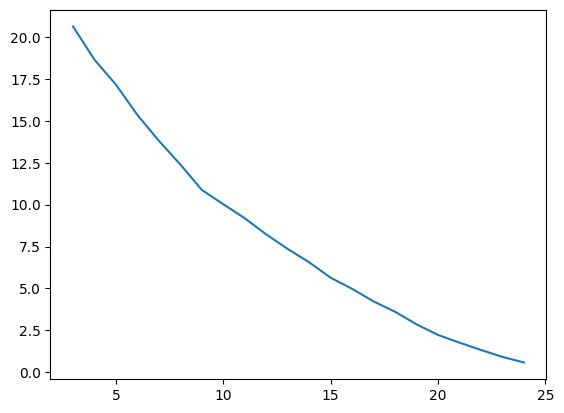

In [18]:
plt.plot(range(3, 25), kmeans_inertia)
plt.show()

In [84]:
warnings.filterwarnings('ignore')
clue='FOOTBALL'
number_words = 2

In [85]:
get_words_from_clue(sample_words, clue, number_words, model)

['paracaídas', 'teclado']

In [87]:
a = get_dataframe_from_clue(sample_words, clue, number_words, model)
a

,cluster,distance_to_clue_cluster,distance_to_clue
FOOTBALL,22,0.000000,0.000000
paracaídas,5,0.931409,0.882143
teclado,5,0.931409,0.912381
capital,5,0.931409,0.967473
cementerio,5,0.931409,1.025812
marca,19,1.209058,0.887344
cadena,21,1.237949,0.916052
pastel,18,1.283994,1.012201
órgano,1,1.301080,0.960347
látigo,20,1.311986,1.005219
